## KNN

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../dataset/Iris.csv")

In [2]:
#Pre-processing
df=df.drop('Id',axis=1)
df['Species']=df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                     (0,1,2))
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
label = df['Species']

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    random_state=2)


C:\Users\Muhammad Afiq\AppData\Local\Temp\ipykernel_23164\1086881330.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),


In [3]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors = 25)

model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=25)

In [4]:
y_pred = model.predict(x_test)

In [5]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

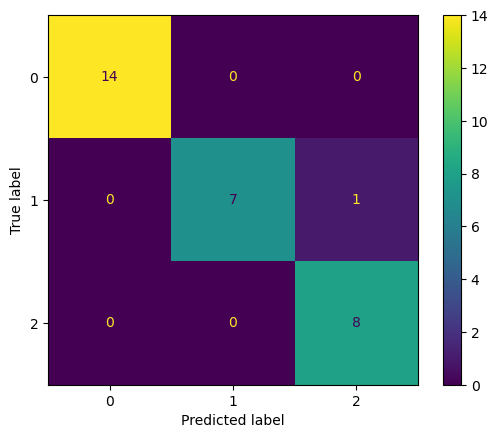

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show

## Load Wine Dataset

In [8]:
from sklearn.datasets import load_wine 

wine = load_wine()
x = wine.data #features
y = wine.target#label

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    random_state=2)

from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6944444444444444

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model1=KNeighborsClassifier(n_neighbors = 9)
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.8055555555555556

### Introduce Standard Scaler

In [10]:
# pre-processing
from sklearn.preprocessing import StandardScaler

x_train

array([[1.258e+01, 1.290e+00, 2.100e+00, ..., 5.800e-01, 1.550e+00,
        6.400e+02],
       [1.145e+01, 2.400e+00, 2.420e+00, ..., 8.000e-01, 3.390e+00,
        6.250e+02],
       [1.208e+01, 1.330e+00, 2.300e+00, ..., 1.070e+00, 3.210e+00,
        6.250e+02],
       ...,
       [1.349e+01, 1.660e+00, 2.240e+00, ..., 9.800e-01, 2.780e+00,
        4.720e+02],
       [1.363e+01, 1.810e+00, 2.700e+00, ..., 1.280e+00, 2.880e+00,
        1.310e+03],
       [1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00,
        7.500e+02]])

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
model = SVC()
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.8611111111111112

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x_train)
x_train_mmscaled = scaler_minmax.transform(x_train)
x_test_mmscaled = scaler_minmax.transform(x_test)

model.fit(x_train_mmscaled,y_train)
model.score(x_test_mmscaled,y_test)

0.9722222222222222

In [15]:
# training data wine classification

x_train_mmscaled
y_train

# testing data wine classification

x_test_mmscaled
y_test

array([0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1])

In [55]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf',gamma = 0.4, C=100)


clf.fit(x_train_mmscaled,y_train)

clf.score(x_test_mmscaled,y_test)


0.9722222222222222

In [56]:
from sklearn.model_selection import GridSearchCV

param = {'C': [0.01, 0.1, 1, 10, 100],
         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

SVC_grid = GridSearchCV(SVC(kernel='rbf'),
                       param_grid=param,
                       refit=True,
                       verbose=3)

SVC_grid.fit(x_train_mmscaled, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.448 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.414 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.429 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.429 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.464 total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.448 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.414 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.429 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.429 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.464 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.448 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=3)

In [57]:
df = pd.read_csv("../../dataset/Iris.csv")
#Pre-processing
df=df.drop('Id',axis=1)
df['Species']=df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                     (0,1,2))
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
label = df['Species']

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    random_state=2)

C:\Users\Muhammad Afiq\AppData\Local\Temp\ipykernel_23164\3470345693.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),


In [58]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x_train)
x_train_mmscaled = scaler_minmax.transform(x_train)
x_test_mmscaled = scaler_minmax.transform(x_test)

In [59]:
from sklearn.model_selection import GridSearchCV

param = {'C': [0.01, 0.1, 1, 10, 100],
         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

SVC_grid = GridSearchCV(SVC(kernel='rbf'),
                       param_grid=param,
                       refit=True,
                       verbose=3)

SVC_grid.fit(x_train_mmscaled, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.333 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.333 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.667 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.333 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.333 total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.333 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.333 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.667 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.333 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.333 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=3)